<a href="https://colab.research.google.com/github/multitude00999/hf_audio_course/blob/main/notebooks/unit0/load_audio_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install librosa

In [2]:
import librosa
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [5]:
# load example audio file
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [12]:
# shape of audio data
print(array.shape)

# calculate length of audio
print(len(array)/sampling_rate)

(117601,)
5.333378684807256


In [6]:
# play audio sample
Audio(data = array, rate = sampling_rate)

## Waveform

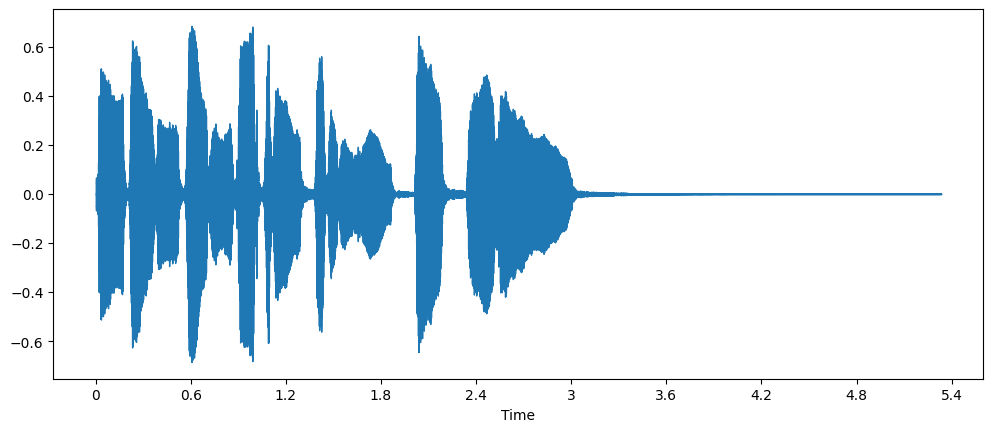

In [8]:

# plot amplitude vs time waveform
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)
plt.show()

## Frequency spectrum

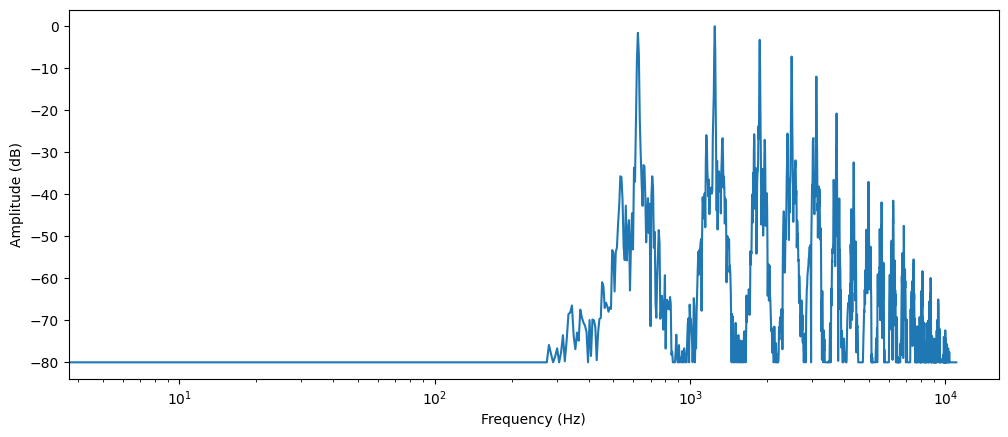

In [17]:

# take starting 4096 samples
dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

##Spectrogram

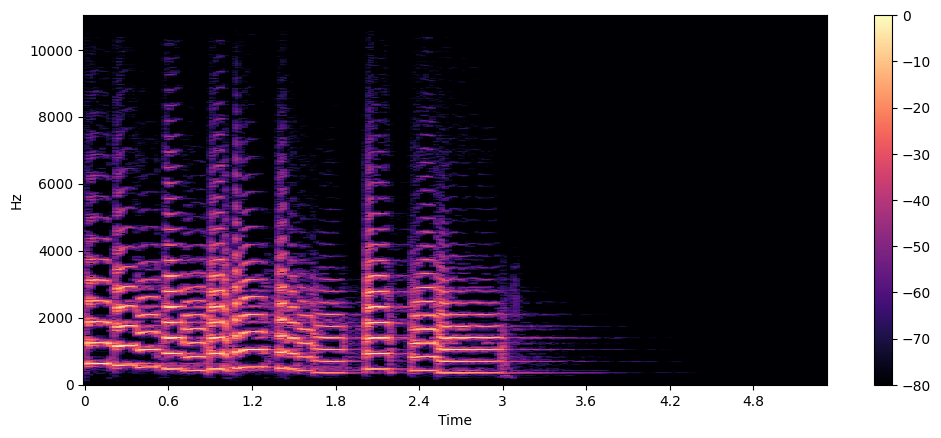

In [21]:
## calculate stft
D = librosa.stft(array)

# convert to decibel scale
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# plot
plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

## Mel spectrogram

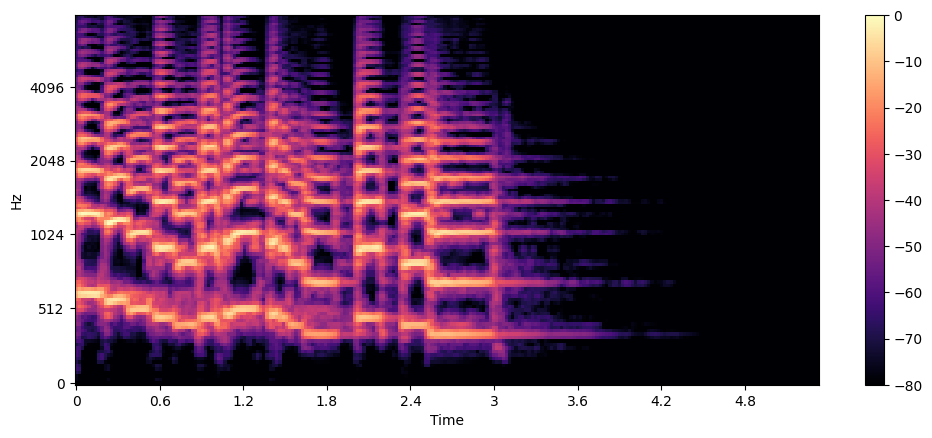

In [22]:
# calculate mel spectrogram (by using filters)
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)

# convert to decibel
S_dB = librosa.power_to_db(S, ref=np.max)

# plot
plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()
plt.show()